### Deep Learning : Predicting Handwriting with Tensor Flow and Keras
#### Model Used : 


In [18]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [16]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

4


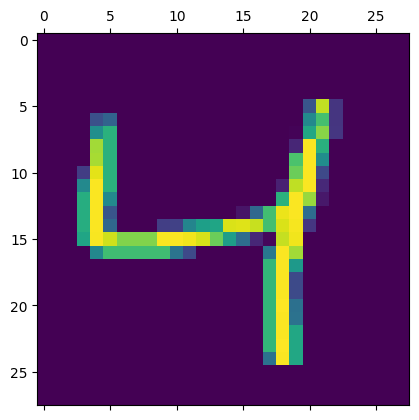

In [23]:
IMG = 2 
print(y_train[IMG])
plt.matshow(x_train[IMG])

In [35]:
# Scalling
x_train = x_train / 255
x_test = x_test / 255

In [32]:
x_train_flattened = x_train.reshape(len(x_train), 28 * 28)

In [33]:
x_train_flattened.shape

(60000, 784)

In [44]:
# INPUT_SHAPE = (784,)
INPUT_SHAPE = (28,28)
OUTPUT_SHAPE = 10 # Since output can be any number between 0 to 9 i.e. 10
NEURONS_IN_HIDDEN_LAYER = 100 # Trial and error basis but less than input shape length

model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=INPUT_SHAPE), # But this is decreaseing accuracy
        keras.layers.Dense(
            NEURONS_IN_HIDDEN_LAYER, activation="relu"
        ),
        keras.layers.Dense(OUTPUT_SHAPE, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# model.fit(x_train_flattened, y_train, epochs=5)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.7053 - loss: 1.2624
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.8634 - loss: 0.5334
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.8884 - loss: 0.4105
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.8997 - loss: 0.3621
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9047 - loss: 0.3358


In [47]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.9112 - loss: 0.3137


[0.3136669993400574, 0.9111999869346619]

In [49]:
prediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step


6
5


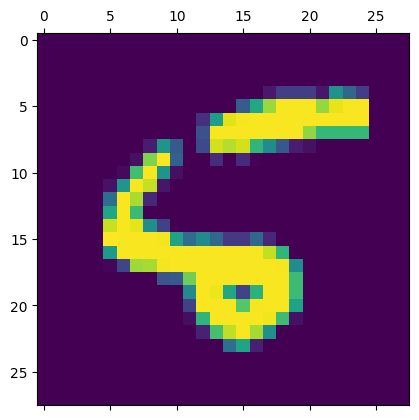

In [65]:
IMG = 8
print(prediction[IMG].argmax())
print(y_test[IMG])

plt.matshow(x_test[IMG])